yt : [INFO     ] 2024-04-09 14:55:44,212 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:44,213 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:44,214 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:44,214 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:44,675 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:44,676 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:44,677 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:44,677 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


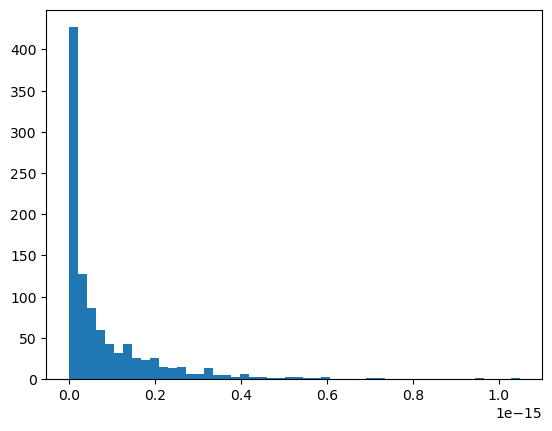

In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt


sigmaarr=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
sigmaspec=np.zeros((20,50))

ds = yt.load('warpx/diags/diag1000000p(0.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx\diags\diag1001270p(0.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1

sigmaspec[0]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:45,316 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:45,316 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:45,317 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:45,317 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:45,793 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:45,794 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:45,794 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:45,795 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


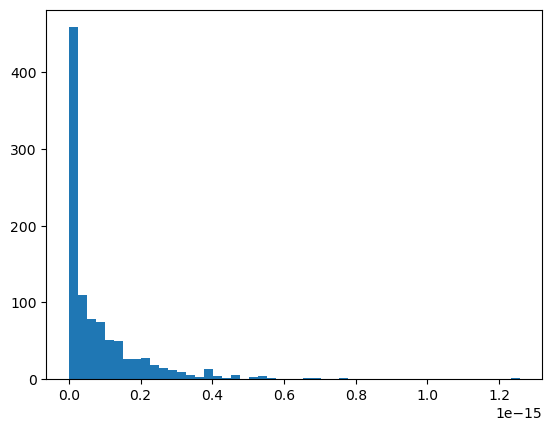

In [2]:
ds = yt.load('warpx/diags/diag1000000p(1)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(1)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)




counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[1]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:46,339 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:46,340 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:46,340 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:46,341 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:46,831 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:46,832 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:46,832 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:46,833 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


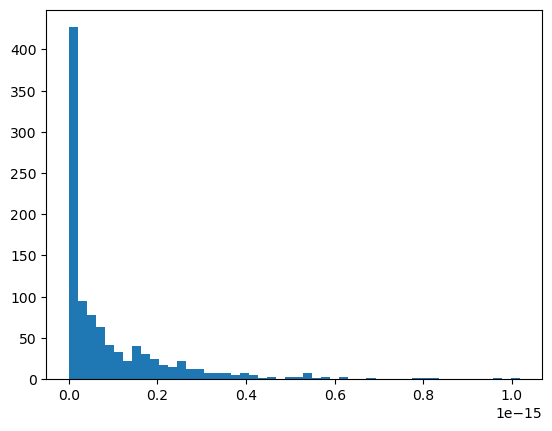

In [3]:
ds = yt.load('warpx/diags/diag1000000p(1.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(1.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)


counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[2]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:47,380 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:47,381 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:47,381 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:47,382 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:47,788 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:47,789 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:47,789 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:47,790 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


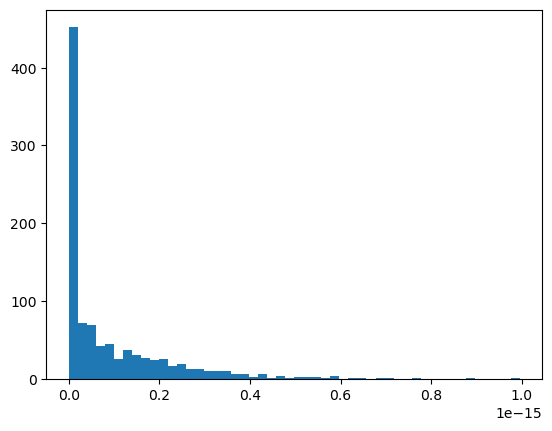

In [4]:
ds = yt.load('warpx/diags/diag1000000p(2)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(2)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[3]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:48,426 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:48,427 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:48,427 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:48,428 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:48,843 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:48,843 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:48,844 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:48,845 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


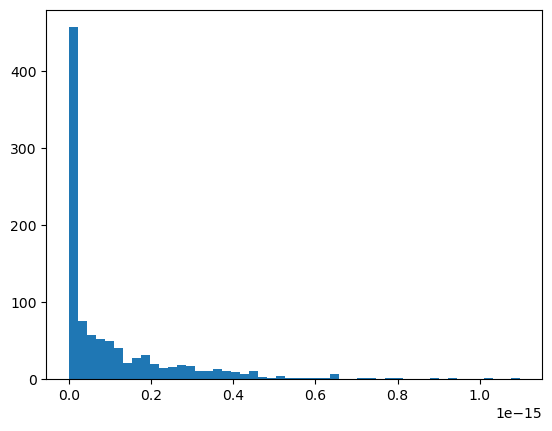

In [5]:
ds = yt.load('warpx/diags/diag1000000p(2.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(2.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)

counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[4]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:49,500 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:49,500 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:49,501 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:49,501 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:49,926 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:49,927 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:49,928 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:49,929 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


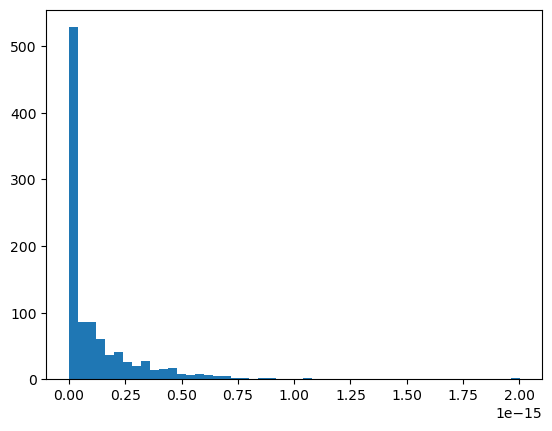

In [6]:
ds = yt.load('warpx/diags/diag1000000p(3)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(3)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[5]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:50,516 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:50,517 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:50,517 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:50,518 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:51,043 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:51,043 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:51,044 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:51,045 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


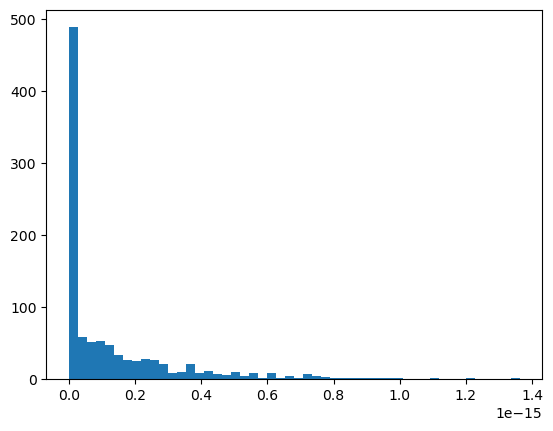

In [7]:
ds = yt.load('warpx/diags/diag1000000p(3.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(3.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[6]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:51,625 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:51,626 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:51,626 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:51,627 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:52,046 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:52,047 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:52,047 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:52,048 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


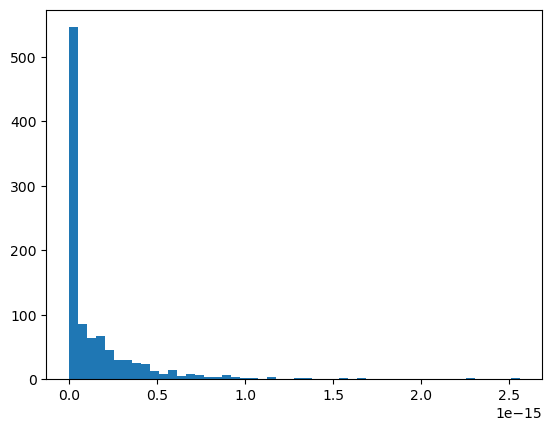

In [8]:
ds = yt.load('warpx/diags/diag1000000p(4)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(4)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)




counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1

sigmaspec[7]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:52,694 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:52,695 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:52,695 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:52,696 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:53,110 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:53,111 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:53,111 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:53,112 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


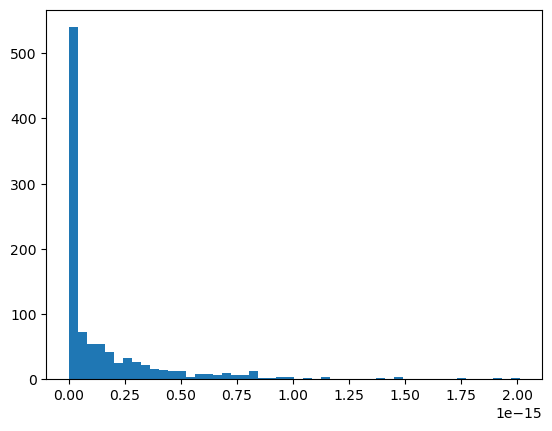

In [9]:
ds = yt.load('warpx/diags/diag1000000p(4.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(4.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)





counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[8]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:53,795 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:53,796 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:53,797 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:53,797 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:54,234 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:54,235 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:54,235 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:54,236 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


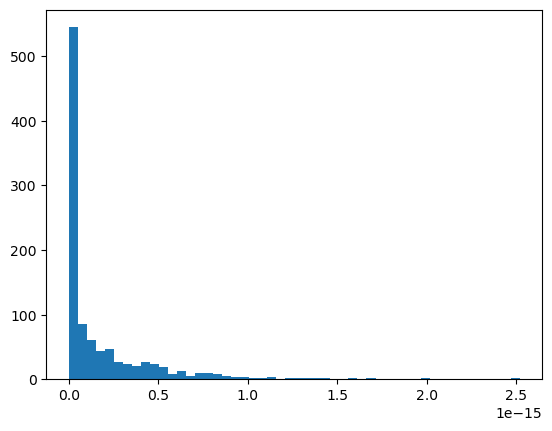

In [10]:
ds = yt.load('warpx/diags/diag1000000p(5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)




counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[9]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:54,806 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:54,807 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:54,807 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:54,808 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:55,323 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:55,324 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:55,324 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:55,325 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


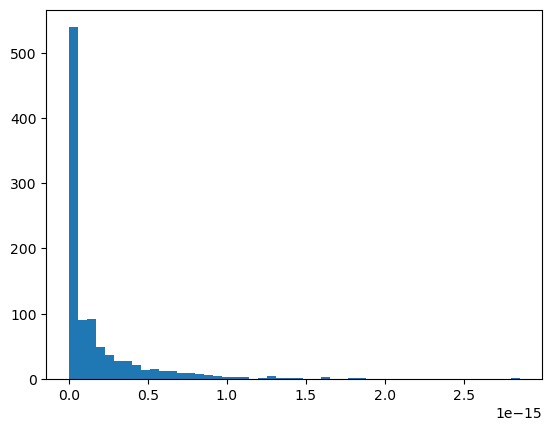

In [11]:
ds = yt.load('warpx/diags/diag1000000p(5.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(5.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)





counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[10]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:55,884 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:55,884 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:55,885 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:55,886 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:56,308 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:56,308 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:56,309 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:56,309 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


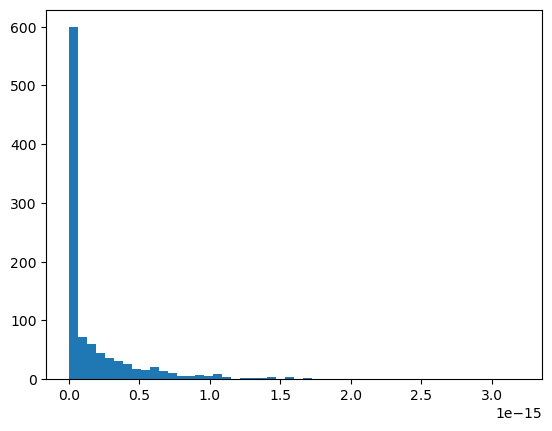

In [12]:
ds = yt.load('warpx/diags/diag1000000p(6)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(6)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)





counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[11]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:56,958 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:56,959 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:56,959 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:56,960 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:57,376 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:57,377 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:57,377 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:57,378 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


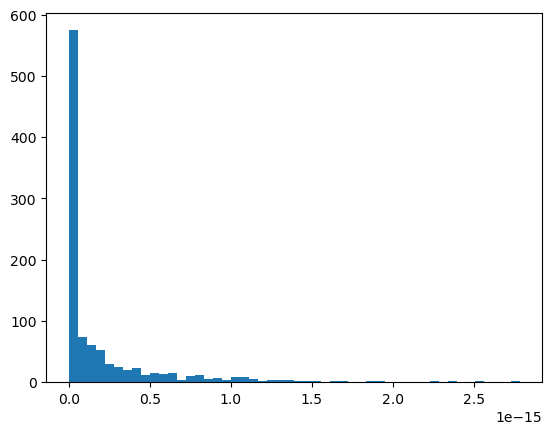

In [13]:
ds = yt.load('warpx/diags/diag1000000p(6.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(6.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)

counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[12]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:55:58,032 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:58,032 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:58,033 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:58,033 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:58,443 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:58,444 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:58,444 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:58,445 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


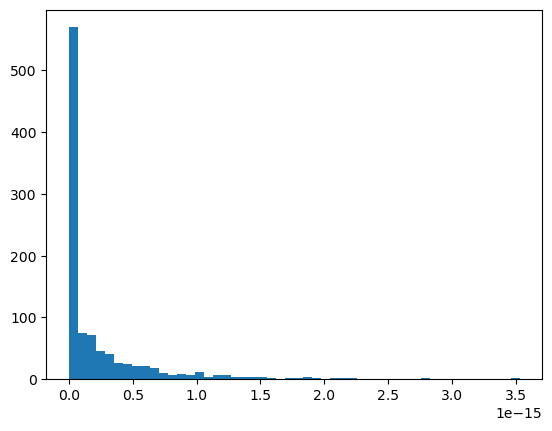

In [14]:
ds = yt.load('warpx/diags/diag1000000p(7)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(7)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)



counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[13]=counts

yt : [INFO     ] 2024-04-09 14:55:59,010 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:55:59,011 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:59,011 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:55:59,012 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:55:59,510 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:55:59,511 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:55:59,511 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:55:59,512 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


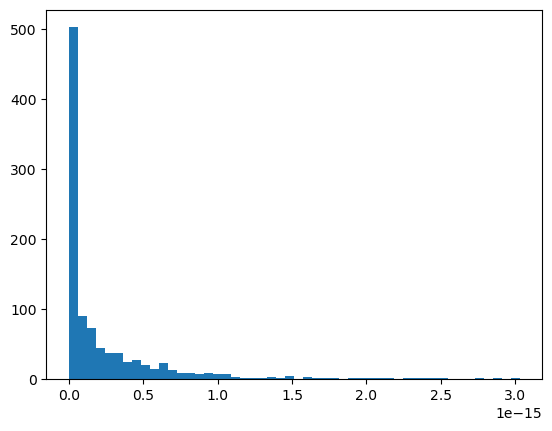

In [15]:
ds = yt.load('warpx/diags/diag1000000p(7.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(7.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[14]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:56:00,071 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:56:00,072 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:00,072 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:56:00,073 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:56:00,573 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:56:00,574 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:00,575 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:56:00,575 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


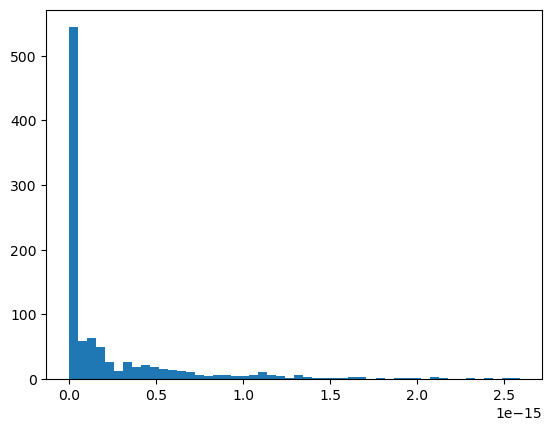

In [16]:
ds = yt.load('warpx/diags/diag1000000p(8)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(8)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[15]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:56:01,130 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:56:01,130 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:01,131 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:56:01,132 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:56:01,551 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:56:01,551 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:01,552 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:56:01,552 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


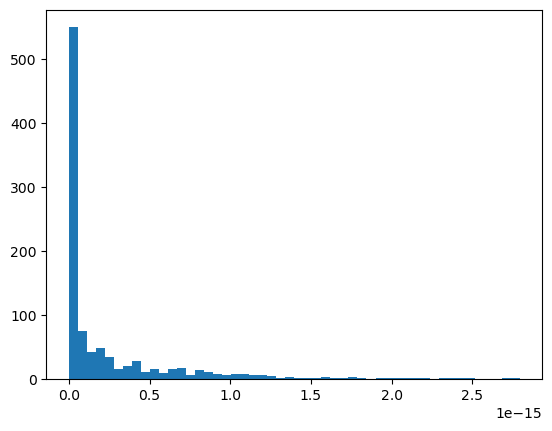

In [17]:
ds = yt.load('warpx/diags/diag1000000p(8.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(8.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[16]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:56:02,205 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:56:02,206 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:02,207 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:56:02,207 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:56:02,616 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:56:02,617 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:02,617 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:56:02,618 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


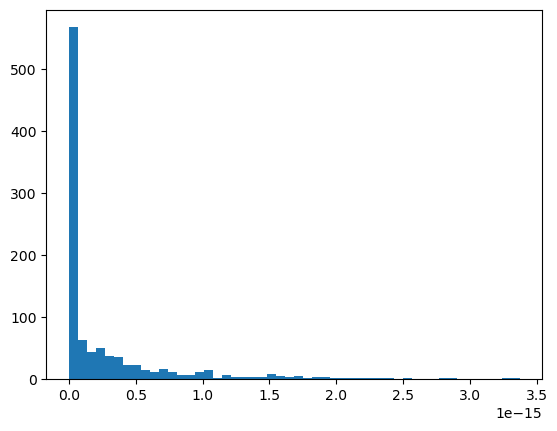

In [18]:
ds = yt.load('warpx/diags/diag1000000p(9)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(9)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[17]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:56:03,191 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:56:03,191 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:03,192 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:56:03,193 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:56:03,703 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:56:03,703 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:03,704 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:56:03,704 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


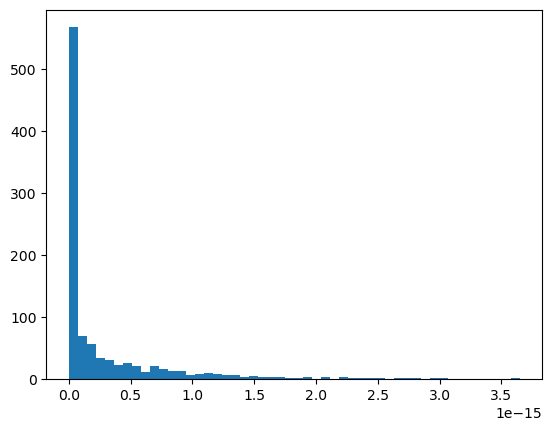

In [19]:
ds = yt.load('warpx/diags/diag1000000p(9.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(9.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[18]=np.array(counts)

yt : [INFO     ] 2024-04-09 14:56:04,265 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-09 14:56:04,266 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:04,267 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-04-09 14:56:04,267 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-04-09 14:56:04,684 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-04-09 14:56:04,684 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-04-09 14:56:04,685 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-04-09 14:56:04,685 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


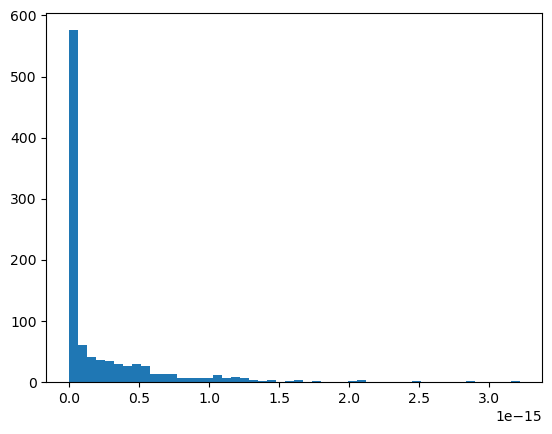

In [20]:
ds = yt.load('warpx/diags/diag1000000p(10)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270p(10)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
counts=counts+1
sigmaspec[19]=np.array(counts)

sigmaspecsave=sigmaspec

18
--- 0.3850865364074707 seconds ---
[7.5 4.5 3.5 3.5 6.  1.  8.  4.  4.  9.  5.5 3.5 2.  3.5 7.  9.5 8.5 8.5
 1.5 7.5 7.5 4.  2.  3.  5.5 1.  2.5 6.  9.  4.5 7.5 3.5 9.  7.  6.  1.
 1.  1.  3.  9. ]
[7.5 4.5 3.5 3.5 6.  1.  8.  4.  4.  9.  5.5 3.5 2.  3.5 7.  9.5 8.5 8.5
 1.5 7.5 7.5 4.  2.  3.  5.5 1.  2.5 6.  9.  4.5 7.5 3.5 9.  7.  6.  1.
 1.  1.  3.  9. ]


<function matplotlib.pyplot.show(close=None, block=None)>

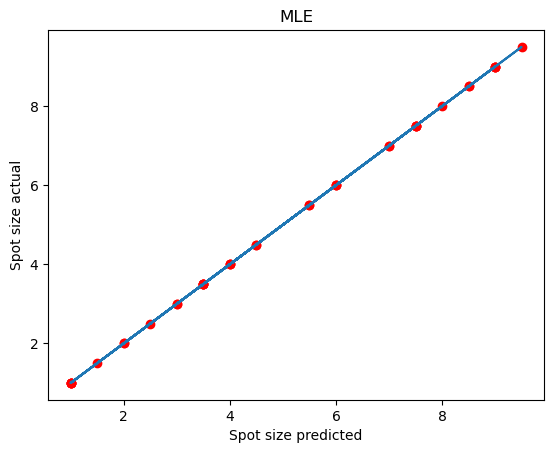

In [21]:
#MlE only
import numpy as np 
import matplotlib.pyplot as plt
import time
start_time = time.time()
sigmaspec=sigmaspecsave

                                                                                                                                                                                                                                                                                                              
                                                                                                                                                                                                                                                                                                         
sigmaarr=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]

maxlikef=np.ones(len(sigmaspec))

yspect=np.zeros((40,50))
likelihoodf=np.ones(len(yspect))
testsigma=np.zeros(19)
sigmaactual=np.ones(len(yspect))
for i in range(len(yspect)):
     randomnum=np.random.randint(0,19)
     

     yspect[i]=sigmaspec[randomnum]
     sigmaactual[i]=sigmaarr[randomnum]

likelihoodfunction=np.zeros((40,20))   

sigma2f=np.ones(len(yspect))


likelihoodf=np.zeros(len(sigmaspec))
reducedarr=np.zeros((len(yspect),5))



for k in range(0,len(yspect)):
    
    yspec=yspect[k]
    yprob=np.ones(len(yspec))
    sigmaf=np.ones(len(sigmaspec))
   
    ysum=0
    for v in range(0,len(yspec)):
        
        ysum=ysum+yspec[v]
    
    for v in range(0,len(yspec)):
             yprob[v]=yspec[v]/ysum                
    

    for i in range(0,(len(sigmaspec))):
        sigma1spec=sigmaspec[i]
        xspec=sigma1spec  
        sigmaf[i]=sigmaarr[i]
    
        xprob=np.ones(len(xspec))
        for j in range(0,(len(xspec))):
            xprob[j]=xspec[j]/(np.array(sum(xspec), dtype=int))
        #print('x',xprob)
        #print('y',yprob)

               
        likelihood=0
        
                       
        for u in range (0,len(xprob)):
                   
                        
                         likelihood=likelihood+yprob[u]*np.log(xprob[u])
              
            
        likelihoodf[i]=likelihood
    
        
       
    

              
        
            #sigma2f[k]=np.array(yspect[p][0], dtype=int)
    
    maxlike=max(likelihoodf)
    #print(likelihoodf)
    #print(maxlike)
    likelihoodfunction[k]=(np.array(likelihoodf  , dtype=float))  
    for h in range(len(likelihoodf)):
      
        if likelihoodf[h]==maxlike:
            #print(h)
            #print(sigmaarr[h])
            sigma2f[k]=np.array(sigmaarr[h], dtype=float)
            if h<1:
              reducedarr[k]=[0,0,likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
            if h==len(likelihoodf)-1:
                
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],0,0]

            if h<2:
                reducedarr[k]=[0,likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
            if h==len(likelihoodf)-2:
                print(h)
                
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],0]
                
            if h in range(2,len(likelihoodf)-2):
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
                
                
              
            
print("--- %s seconds ---" % (time.time() - start_time))        
            
#print(reducedarr)    
            
yspect1=yspect            
reducedarr1=reducedarr
likelihoodfunction1=likelihoodfunction
sigmaactual1=sigmaactual
print(sigma2f)
print(sigmaactual)
plt.figure
plt.title("MLE")
plt.xlabel("Spot size predicted")
plt.ylabel("Spot size actual")
plt.scatter(sigma2f,sigmaactual, color='r')
plt.plot(sigmaactual,sigmaactual)
plt.show

18
[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10. ]
[5.  4.5 8.5 2.5 2.5 7.  6.5 7.5 8.5 7.  2.  9.5 4.  3.  4.5 4.  0.5 8.5
 1.5 4.5 8.5 2.  6.  6.5 9.  8.  9.  8.  2.5 8.5 6.5 9.  5.  9.5 9.  7.
 1.  2.  9.  6. ]


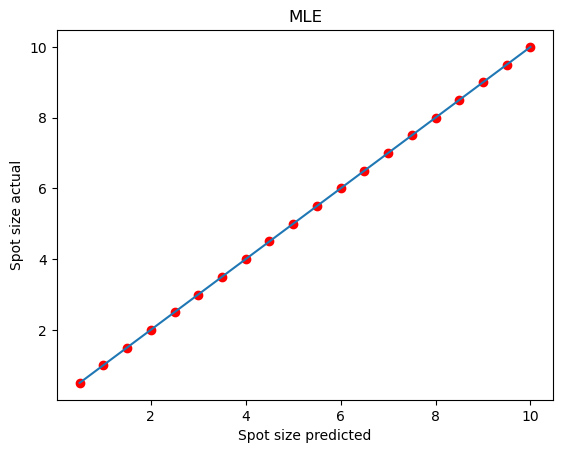

In [22]:
#MLE setup for ml training
import numpy as np 
import matplotlib.pyplot as plt
import time
start_time = time.time()

sigmaspec=sigmaspecsave

                                                                                                                                                                                                                                                                                                              
sigmaarr=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]                                                                                                                                                                                                                                                                                                    

maxlikef=np.ones(len(sigmaspec))
yspect=np.zeros((20,50))
yspect2=np.zeros((40,50))
likelihoodf=np.ones(len(yspect))
testsigma=np.zeros(19)

sigmaactual=np.ones(len(yspect2))
for i in range(len(yspect2)):
     randomnum=np.random.randint(0,19)
     

     yspect2[i]=sigmaspec[randomnum]
     sigmaactual[i]=sigmaarr[randomnum]
yspect=sigmaspec


likelihoodfunction=np.zeros((20,20))   

sigma2f=np.ones(len(yspect))



likelihoodf=np.zeros(len(sigmaspec))
reducedarr=np.zeros((len(yspect),5))



for k in range(0,len(yspect)):
    
    yspec=yspect[k]
    yprob=np.ones(len(yspec))
    sigmaf=np.ones(len(sigmaspec))
   
    ysum=0
    for v in range(0,len(yspec)):
        
        ysum=ysum+yspec[v]
    
    for v in range(0,len(yspec)):
             yprob[v]=yspec[v]/ysum                
    

    for i in range(0,(len(sigmaspec))):
        sigma1spec=sigmaspec[i]
        xspec=sigma1spec  
        sigmaf[i]=sigmaarr[i]
    
        xprob=np.ones(len(xspec))
        for j in range(0,(len(xspec))):
            xprob[j]=xspec[j]/(np.array(sum(xspec), dtype=int))
        #print('x',xprob)
        #print('y',yprob)

               
        likelihood=0
        
                       
        for u in range (0,len(xprob)):
                   
                        
                         likelihood=likelihood+yprob[u]*np.log(xprob[u])
              
            
        likelihoodf[i]=likelihood
    
        
       
    

              
        
            #sigma2f[k]=np.array(yspect[p][0], dtype=int)
    
    maxlike=max(likelihoodf)
    #print(likelihoodf)
    #print(maxlike)
    likelihoodfunction[k]=(np.array(likelihoodf  , dtype=float))  
    for h in range(len(likelihoodf)):
      
        if likelihoodf[h]==maxlike:
            #print(h)
            #print(sigmaarr[h])
            sigma2f[k]=np.array(sigmaarr[h], dtype=float)
            if h<1:
              reducedarr[k]=[0,0,likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
            if h==len(likelihoodf)-1:
                
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],0,0]

            if h<2:
                reducedarr[k]=[0,likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
            if h==len(likelihoodf)-2:
                print(h)
                
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],0]
                
            if h in range(2,len(likelihoodf)-2):
                reducedarr[k]=[likelihoodf[h-2],likelihoodf[h-1],likelihoodf[h],likelihoodf[h+1],likelihoodf[h+2]]
                
                
                
            
                
            
#print(reducedarr)    
            
            

print(sigma2f)
print(sigmaactual)
plt.figure
plt.title("MLE")
plt.xlabel("Spot size predicted")
plt.ylabel("Spot size actual")
plt.scatter(sigma2f,sigmaarr, color='r')
plt.plot(sigmaarr,sigmaarr)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
40
20
[14  8  6  6 11  1 15  7  7 17 10  6  3  6 13 18 16 16  2 14 14  7  3  5
 10  1  4 11 17  8 14  6 17 13 11  1  1  1  5 17]
[7.5 4.5 3.5 3.5 6.  1.  8.  4.  4.  9.  5.5 3.5 2.  3.5 7.  9.5 8.5 8.5
 1.5 7.5 7.5 4.  2.  3.  5.5 1.  2.5 6.  9.  4.5 7.5 3.5 9.  7.  6.  1.
 1.  1.  3.  9. ]
[7.5 4.5 3.5 3.5 6.  1.  8.  4.  4.  9.  5.5 3.5 2.  3.5 7.  9.5 8.5 8.5
 1.5 7.5 7.5 4.  2.  3.  5.5 1.  2.5 6.  9.  4.5 7.5 3.5 9.  7.  6.  1.
 1.  1.  3.  9. ]
0.0
--- 1.3082926273345947 seconds ---


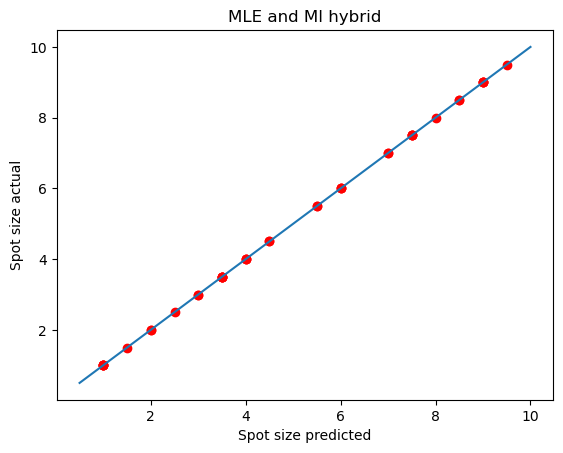

In [23]:
#hybrid ML and MLE
import time
start_time = time.time()

from sklearn.neural_network import MLPClassifier
#sigmapos=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
from sklearn.model_selection import train_test_split

sigmapos=np.zeros(len(sigmaarr))
n=0
for i in range(len(sigmaarr)):
    
    sigmapos[i]=n
    n=n+1
sigmapos=sigmapos.astype('int')
print(sigmapos)
testdata=yspect.astype('int')
xdataarr=reducedarr

sigmaarr=np.array(sigmaarr)
mlp = MLPClassifier(solver = 'adam', activation = 'tanh', alpha = 1e-5, hidden_layer_sizes = (500, 200), 
                    random_state = 1, max_iter = 10000)
mlp.fit(reducedarr,sigmapos)
predict=mlp.predict(reducedarr1)
sigmapred=np.zeros(len(predict))
sigmapred=np.zeros(len(predict))

sigmapred=np.zeros(len(predict))
print(len(sigmapred))
print(len(sigmaarr))
print(predict)
for i in range(len(sigmapred)):
    sigmapred[i]=sigmaarr[predict[i]]
print(sigmapred)
print(sigmaactual1)
meansquarederror=(sum(sigmaactual1-sigmapred)**2)/len(sigmaactual1)
print(meansquarederror)
print("--- %s seconds ---" % (time.time() - start_time))

plt.figure
plt.title("MLE and Ml hybrid")
plt.xlabel("Spot size predicted")
plt.ylabel("Spot size actual")
plt.scatter(sigmapred,sigmaactual1, color='r')
plt.plot(sigmaarr,sigmaarr)
plt.show()

 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[7.5 4.5 3.5 3.5 6.  1.  8.  4.  4.  9.  5.5 3.5 2.  3.5 7.  9.5 8.5 8.5
 1.5 7.5 7.5 4.  2.  3.  5.5 1.  2.5 6.  9.  4.5 7.5 3.5 9.  7.  6.  1.
 1.  1.  3.  9. ]
[7.5 4.5 3.5 3.5 6.  1.  8.  4.  4.  9.  5.5 3.5 2.  3.5 7.  9.5 8.5 8.5
 1.5 7.5 7.5 4.  2.  3.  5.5 1.  2.5 6.  9.  4.5 7.5 3.5 9.  7.  6.  1.
 1.  1.  3.  9. ]
0.0
--- 0.28406476974487305 seconds ---


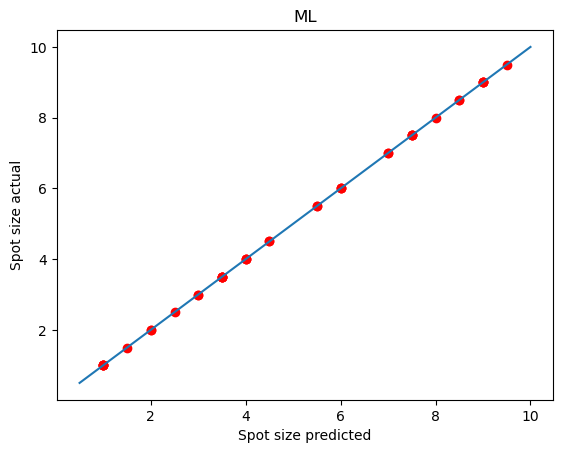

In [24]:
#ML only
import time
start_time = time.time()
from sklearn.neural_network import MLPClassifier
sigmapos=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
from sklearn.model_selection import train_test_split

sigmapos=np.zeros(len(sigmaarr))

for i in range(len(sigmaarr)):
    
    sigmapos[i]=(sigmaarr[i]*2)-1
sigmapos=sigmapos.astype('int')
print(sigmapos)
testdata=yspect.astype('int')
xdataarr=reducedarr

sigmaarr=np.array(sigmaarr)
mlp = MLPClassifier(solver = 'adam', activation = 'tanh', alpha = 1e-5, hidden_layer_sizes = (50, 50), 
                    random_state = 1, max_iter = 10000)
mlp.fit(sigmaspec,sigmapos)
predict=mlp.predict(yspect1)
sigmapred=np.zeros(len(predict))
for i in range(len(sigmapred)):
    sigmapred[i]=sigmaarr[predict[i]]
print(sigmapred)
print(sigmaactual1)
meansquarederror=(sum(sigmaactual1-sigmapred)**2)/len(sigmaactual1)
print(meansquarederror)
print("--- %s seconds ---" % (time.time() - start_time))
plt.figure
plt.title("ML")
plt.xlabel("Spot size predicted")
plt.ylabel("Spot size actual")
plt.scatter(sigmapred,sigmaactual1, color='r')
plt.plot(sigmaarr,sigmaarr)
plt.show()